In [622]:
import numpy as np
import pandas as pd
import os

In [623]:
os.chdir('/home/ec2-user/sentibits/models/data/')

In [624]:
names = ['Date','Positive','Neutral','Negative','Total']
train_tweets = pd.read_table('training/training.txt',names=names,delim_whitespace=True)
test_tweets = pd.read_table('test/test.txt',names=names,delim_whitespace=True)

In [625]:
train_tweets.head()

Date  Positive  Neutral  Negative  Total
0  05/05/17     10307    13329      2788  26424
1  05/06/17     17379    26421      4646  48446
2  05/07/17     13781    24403      4902  43086
3  05/08/17     14402    23082      3652  41136
4  05/09/17     15985    27169      4416  47570

In [626]:
train_tweets.tail()

Date  Positive  Neutral  Negative  Total
17  05/23/17     33037    48443      8980  90460
18  05/24/17     30526    50816     10547  91889
19  05/25/17     22124    33340      6474  61938
20  05/26/17     33841    51865     12979  98685
21  05/27/17     36117    47298      9050  92465

In [627]:
test_tweets.head()

Date  Positive  Neutral  Negative  Total
0  05/28/17     16810    30960      4936  52706
1  05/29/17     17469    31658      5321  54448
2  05/30/17     21544    37833      5465  64842
3  05/31/17     20568    38372      6641  65581
4  06/01/17     19986    41887      5970  67843

In [628]:
test_tweets.tail()

Date  Positive  Neutral  Negative   Total
3  05/31/17     20568    38372      6641   65581
4  06/01/17     19986    41887      5970   67843
5  06/02/17     18958    31425      4551   54934
6  06/03/17     21201    36415      6001   63617
7  06/04/17     33328    56860     10295  100483

In [629]:
train_values = train_tweets[["Positive","Negative"]]
test_values = test_tweets[["Positive","Negative"]]

In [630]:
from hmmlearn import hmm

In [631]:
hmmModel = hmm.GaussianHMM(n_components=2,covariance_type="diag",n_iter=1000).fit(train_values)

/home/ec2-user/sentibits/env/local/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/ec2-user/sentibits/env/local/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/ec2-user/sentibits/env/local/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/ec

In [632]:
hidden_states = hmmModel.predict(test_values)

/home/ec2-user/sentibits/env/local/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


In [633]:
hidden_states

array([0, 0, 0, 0, 0, 0, 0, 1])

In [634]:
hmmModel.transmat_

array([[  9.40003813e-01,   5.99961870e-02],
       [  4.49206873e-06,   9.99995508e-01]])

[[  9.40003813e-01   5.99961870e-02]
 [  4.49206873e-06   9.99995508e-01]]
()
Means and vars of each hidden state
0th hidden state
('mean = ', array([ 17074.0754952 ,   4853.45275947]))
('var = ', array([ 29098092.65519341,   2905930.9059935 ]))
()
1th hidden state
('mean = ', array([ 30496.62077331,   9475.40902339]))
('var = ', array([ 28012336.99866427,   4527692.23258508]))
()


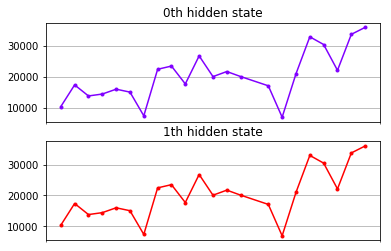

In [635]:
## print("Transition matrix")
print(hmmModel.transmat_)
print()

print("Means and vars of each hidden state")
for i in range(hmmModel.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", hmmModel.means_[i])
    print("var = ", np.diag(hmmModel.covars_[i]))
    print()

fig, axs = plt.subplots(hmmModel.n_components, sharex=True, sharey=True)
colours = cm.rainbow(np.linspace(0, 1, model.n_components))
for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    ax.plot_date(train_tweets["Date"], train_tweets["Positive"], ".-", c=colour)
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())

    ax.grid(True)

plt.show()

In [636]:
from sklearn.externals import joblib
joblib.dump(hmmModel,'/home/ec2-user/sentibits/models/model/hmm.pkl')

['/home/ec2-user/sentibits/models/model/hmm.pkl']

### Training Data

In [637]:
import requests

In [638]:
train_request = requests.get('http://api.coindesk.com/v1/bpi/historical/close.json?start=2017-05-05&end=2017-05-27')
train_json = train_request.json()['bpi']
print train_json

{u'2017-05-23': 2291.4775, u'2017-05-22': 2139.0275, u'2017-05-21': 2055.6175, u'2017-05-20': 2051.735, u'2017-05-27': 2106.3075, u'2017-05-26': 2247.4825, u'2017-05-25': 2357.5038, u'2017-05-24': 2476.2963, u'2017-05-05': 1512.2088, u'2017-05-07': 1555.4713, u'2017-05-06': 1548.2863, u'2017-05-09': 1706.9313, u'2017-05-08': 1639.3225, u'2017-05-12': 1676.9938, u'2017-05-13': 1759.9613, u'2017-05-10': 1756.8025, u'2017-05-11': 1807.3725, u'2017-05-16': 1718.2013, u'2017-05-17': 1802.1638, u'2017-05-14': 1772.4163, u'2017-05-15': 1697.3788, u'2017-05-18': 1887.3263, u'2017-05-19': 1968.1025}


In [639]:
train_prices = pd.DataFrame(train_json.items(),columns=["Date","Close"])
train_prices.head()

Date      Close
0  2017-05-23  2291.4775
1  2017-05-22  2139.0275
2  2017-05-21  2055.6175
3  2017-05-20  2051.7350
4  2017-05-27  2106.3075

In [640]:
train_prices = train_prices.sort_values("Date")
train_prices.tail()

Date      Close
0  2017-05-23  2291.4775
7  2017-05-24  2476.2963
6  2017-05-25  2357.5038
5  2017-05-26  2247.4825
4  2017-05-27  2106.3075

In [641]:
closing = np.diff(test_prices["Close"])
closing

array([  82.2925,  -92.6362,  133.    ,  121.9475,   65.2275,   38.245 ])

In [642]:
closing[closing > 0] = 0
closing[closing < 0] = 1
closing

array([ 0.,  1.,  0.,  0.,  0.,  0.])

In [643]:
import matplotlib.pyplot as plt

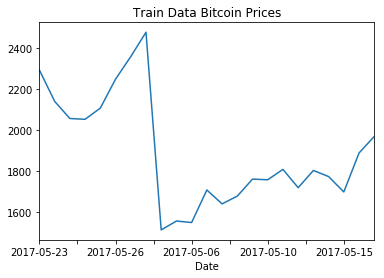

In [644]:
%matplotlib inline
price = pd.Series(prices["Close"].values,index=prices["Date"])
plt.title("Train Data Bitcoin Prices")
price.plot()

### Testing Data

In [645]:
test_request = requests.get('http://api.coindesk.com/v1/bpi/historical/close.json?start=2017-05-28&end=2017-06-04')
test_json = test_request.json()['bpi']
print test_json

{u'2017-05-30': 2197.2338, u'2017-05-31': 2330.2338, u'2017-06-04': 2552.8088, u'2017-06-01': 2452.1813, u'2017-06-02': 2517.4088, u'2017-06-03': 2555.6538, u'2017-05-29': 2289.87, u'2017-05-28': 2207.5775}


In [646]:
test_prices = pd.DataFrame(test_json.items(),columns=["Date","Close"])
test_prices.head()

Date      Close
0  2017-05-30  2197.2338
1  2017-05-31  2330.2338
2  2017-06-04  2552.8088
3  2017-06-01  2452.1813
4  2017-06-02  2517.4088

In [647]:
test_prices = test_prices.sort_values("Date")
test_prices.tail()

Date      Close
1  2017-05-31  2330.2338
3  2017-06-01  2452.1813
4  2017-06-02  2517.4088
5  2017-06-03  2555.6538
2  2017-06-04  2552.8088

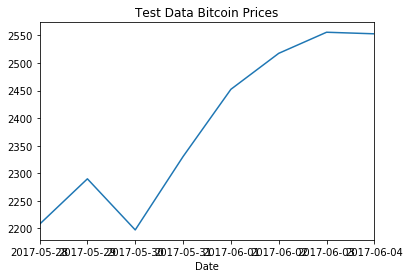

In [648]:
%matplotlib inline
price = pd.Series(test_prices["Close"].values,index=test_prices["Date"])
plt.title("Test Data Bitcoin Prices")
price.plot()

In [649]:
from sklearn.metrics import accuracy_score,auc,confusion_matrix

In [650]:
accuracy_score(closing,hidden_states[1:len(hidden_states)-1])

0.83333333333333337

In [651]:
confusion_matrix(closing,hidden_states[1:len(hidden_states)-1])

array([[5, 0],
       [1, 0]])

In [652]:
train_states = hmmModel.predict(train_values)
test_states = hmmModel.predict(test_values)

/home/ec2-user/sentibits/env/local/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/ec2-user/sentibits/env/local/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


In [653]:
train_states

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [654]:
test_states

array([0, 0, 0, 0, 0, 0, 0, 1])

In [655]:
all_states = np.append(train_states,test_states)

In [656]:
dates = np.arange('2017-05-06', '2017-06-05', dtype='datetime64[D]')
dates

array(['2017-05-06', '2017-05-07', '2017-05-08', '2017-05-09',
       '2017-05-10', '2017-05-11', '2017-05-12', '2017-05-13',
       '2017-05-14', '2017-05-15', '2017-05-16', '2017-05-17',
       '2017-05-18', '2017-05-19', '2017-05-20', '2017-05-21',
       '2017-05-22', '2017-05-23', '2017-05-24', '2017-05-25',
       '2017-05-26', '2017-05-27', '2017-05-28', '2017-05-29',
       '2017-05-30', '2017-05-31', '2017-06-01', '2017-06-02',
       '2017-06-03', '2017-06-04'], dtype='datetime64[D]')

In [657]:
print len(dates),len(all_states)

30 30


In [658]:
to_db = pd.DataFrame(zip(dates,all_states),columns=["Date","State"])

In [659]:
to_db.head()

Date  State
0 2017-05-06      0
1 2017-05-07      0
2 2017-05-08      0
3 2017-05-09      0
4 2017-05-10      0

### Insert Initial Values into Database

In [660]:
from pymongo import MongoClient
db = MongoClient()['csc478']

In [661]:
db.sentiments.delete_many({})

In [662]:
for item in to_db.values:
    db.sentiments.insert_one({
        "date": item[0],
        "sentiment": item[1]
    })